### **Machine Learning Assignment 2**

**Roll No:160121733164**

**Name:Meghanath Reddy**

**Class:CSE-3**

***Question***

Select data set of your choice and perform the following tasks.
1.	Build a classification model on any given dataset  using the following approaches
a.	Logistic Regression
b.	Naïve Bayes
c.	Decision Tree
d.	Ensemble Methods(Bagging ,Boosting, Stacking)
e.	SVM ( Linear, Polynomial, Gaussian RBF, Sigmoid)
f.	KNN
g.	Deep Learning
2.	Evaluate the model using classification metrics.
3.	For binary classification models draw ROC curve in a single graph and also find their AUC scores.
4.	Write your observations on the datasets in connection with all approaches ( draw a comparative table on important metrics like accuracy score, sensitivity, specificity and AUC score on different algorithms)
5.	Write a report on your observations on the problem statement.


***Solution***

I am choosing a apple quality dataset.It is a binary classification dataset.

**Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #for scaling
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt #for ploting statistics
import seaborn as sns

**Data statistics**

In [ ]:
data = pd.read_csv(r"/content/apple_quality.csv")

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.drop('A_id', axis = 1, inplace = True)
#we don't require apple id's,So removing this column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [ ]:
data = data.dropna(axis = 0)
#axis=0 means delete rows
#dropna is a function used to remove empty or null values.

In [ ]:
print(data)

In [ ]:
data.iloc[:, -1 :].value_counts()
#selecting last cloumn as it is the target column

Quality
good       2004
bad        1996
Name: count, dtype: int64

*Defining a function to convet text to nubers to classify,as it is not applicable for text.*

In [ ]:
def catagorical(item):
    if item == 'good':
        return 1.0
    else:
        return 0.0

In [ ]:
data['Quality'] = data['Quality'].apply(lambda x: catagorical(x))

In [ ]:
data['Quality'].value_counts()

Quality
1.0    2004
0.0    1996
Name: count, dtype: int64

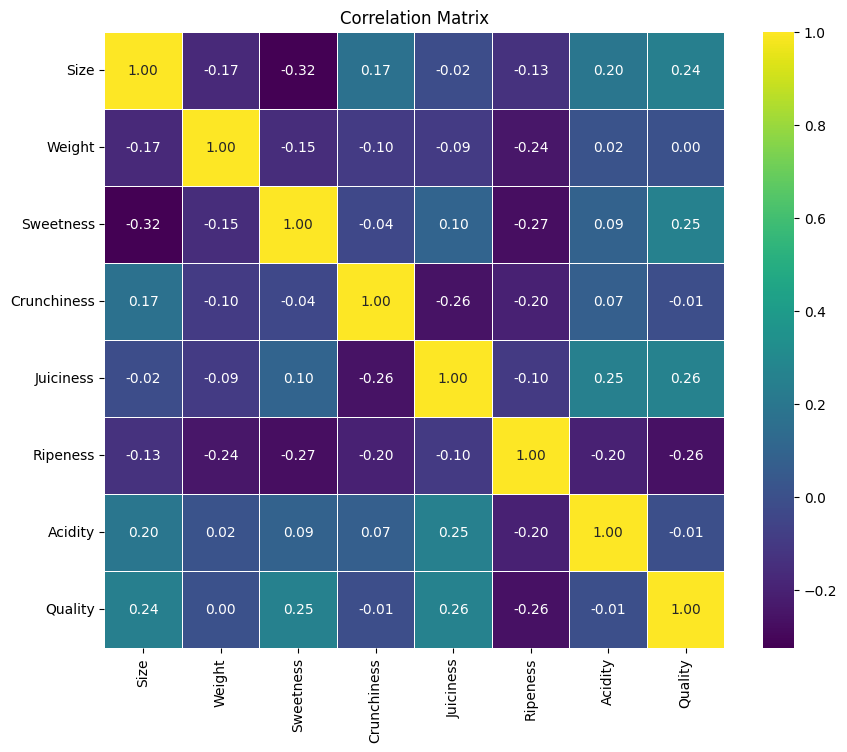

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

**Training datasets**



In [ ]:
X = data.iloc[:, : -1]
y = data.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Classification Report function
def class_report(yt, yp):
    return pd.DataFrame(classification_report(yt, yp, output_dict = True)).transpose()

In [ ]:
# Confusion Matrix function
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)

    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'viridis', fmt = '0.2f', annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Apple Quality Classification')
    plt.show()

### ***Different Approaches for classification***

In [ ]:
#To find a classification metrics for each model,a function is defined.
def print_classification_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

### **a Logistic Regression**

In [224]:
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,precision_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [225]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')
lr.fit(X_train,y_train.ravel())
Y_pred = lr.predict(X_test)

In [226]:
print_classification_metrics(y_test, Y_pred)

Accuracy: 0.7525
Precision: 0.7531486146095718
Recall: 0.7493734335839599
F1-score: 0.7512562814070352
Confusion Matrix:
 [[303  98]
 [100 299]]


### **b.	Naive Bayes**

In [230]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [231]:
#Using Gaussian Naive Bayes
nb = GaussianNB()

In [232]:
nb.fit(X_train, y_train.ravel())

GaussianNB()

In [233]:
y_pred = nb.predict(X_test)

In [234]:
print_classification_metrics(y_test, y_pred)

Accuracy: 0.77
Precision: 0.7777777777777778
Recall: 0.7543859649122807
F1-score: 0.7659033078880407
Confusion Matrix:
 [[315  86]
 [ 98 301]]


### **c.	Decision Tree**

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [236]:
dt = DecisionTreeClassifier(max_depth=3)

In [237]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [238]:
y_pred_dt = dt.predict(X_test)

In [239]:
print_classification_metrics(y_test, y_pred_dt)

Accuracy: 0.72125
Precision: 0.662962962962963
Recall: 0.8972431077694235
F1-score: 0.7625133120340787
Confusion Matrix:
 [[219 182]
 [ 41 358]]


### ***d.	Ensemble Methods(Bagging ,Boosting, Stacking)***

**Bagging**

In [240]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize base model
base_model = DecisionTreeClassifier()

# Step 2: Initialize BaggingClassifier
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Step 3: Train the model
bagging_model.fit(X_train, y_train.ravel())

# Step 4: Make predictions
y_pred_bagging = bagging_model.predict(X_test)


In [241]:
print_classification_metrics(y_test, y_pred_bagging)

Accuracy: 0.865
Precision: 0.8943089430894309
Recall: 0.8270676691729323
F1-score: 0.8593749999999999
Confusion Matrix:
 [[362  39]
 [ 69 330]]


**Boosting**

In [242]:
from sklearn.ensemble import AdaBoostClassifier

# Step 1: Initialize base model (e.g., DecisionTreeClassifier)
base_model = DecisionTreeClassifier()

# Step 2: Initialize AdaBoostClassifier
boosting_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Step 3: Train the model
boosting_model.fit(X_train, y_train.ravel())

# Step 4: Make predictions
y_pred_boosting = boosting_model.predict(X_test)


In [243]:
print_classification_metrics(y_test,y_pred_boosting)

Accuracy: 0.815
Precision: 0.8145363408521303
Recall: 0.8145363408521303
F1-score: 0.8145363408521303
Confusion Matrix:
 [[327  74]
 [ 74 325]]


**Stacking**

In [244]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Step 1: Initialize base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC())
]

# Step 2: Initialize meta-model (blender)
meta_model = LogisticRegression()

# Step 3: Initialize StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Step 4: Train the model
stacking_model.fit(X_train, y_train.ravel())

# Step 5: Make predictions
y_pred_stacking = stacking_model.predict(X_test)


In [245]:
print_classification_metrics(y_test,y_pred_stacking)

Accuracy: 0.9
Precision: 0.8957816377171216
Recall: 0.9047619047619048
F1-score: 0.9002493765586035
Confusion Matrix:
 [[359  42]
 [ 38 361]]


### ***e.	SVM ( Linear, Polynomial, Gaussian RBF, Sigmoid)***

In [258]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [259]:
svm_linear = SVC(kernel='linear')  #linear
svm_poly = SVC(kernel='poly', degree=3)  #Polynomial
svm_rbf = SVC(kernel='rbf', gamma='scale')  #Gaussian rbf
svm_sigmoid = SVC(kernel='sigmoid')  #Sigmoid

In [260]:
svm_linear.fit(X_train, y_train.ravel())

SVC(kernel='linear')

In [261]:
svm_poly.fit(X_train, y_train.ravel())

SVC(kernel='poly')

In [262]:
svm_rbf.fit(X_train, y_train.ravel())

SVC()

In [263]:
svm_sigmoid.fit(X_train, y_train.ravel())


SVC(kernel='sigmoid')

In [264]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

In [265]:
def print_classification_metricsk(y_true, y_pred, kernel):
    print("Kernel:", kernel)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print_classification_metricsk(y_test, y_pred_linear, "Linear")
print()
print_classification_metricsk(y_test, y_pred_poly, "Polynomial")
print()
print_classification_metricsk(y_test, y_pred_rbf, "Gaussian RBF")
print()
print_classification_metricsk(y_test, y_pred_sigmoid, "Sigmoid")

Kernel: Linear
Accuracy: 0.755
Precision: 0.7481662591687042
Recall: 0.7669172932330827
F1-score: 0.7574257425742575
Confusion Matrix:
 [[298 103]
 [ 93 306]]

Kernel: Polynomial
Accuracy: 0.87375
Precision: 0.8253275109170306
Recall: 0.9473684210526315
F1-score: 0.882147024504084
Confusion Matrix:
 [[321  80]
 [ 21 378]]

Kernel: Gaussian RBF
Accuracy: 0.905
Precision: 0.8987654320987655
Recall: 0.9122807017543859
F1-score: 0.9054726368159204
Confusion Matrix:
 [[360  41]
 [ 35 364]]

Kernel: Sigmoid
Accuracy: 0.5275
Precision: 0.5267175572519084
Recall: 0.518796992481203
F1-score: 0.5227272727272728
Confusion Matrix:
 [[215 186]
 [192 207]]


### ***f.	KNN***

In [266]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [267]:
knn = KNeighborsClassifier(n_neighbors=5)

In [268]:
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [269]:
y_pred_knn = knn.predict(X_test)

In [270]:
print_classification_metrics(y_test, y_pred_knn)

Accuracy: 0.89375
Precision: 0.8925
Recall: 0.8947368421052632
F1-score: 0.8936170212765957
Confusion Matrix:
 [[358  43]
 [ 42 357]]


### ***g. Deep Learning***

In [271]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [272]:
# Ensure X and y are NumPy arrays of the correct data type
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [273]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [274]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [275]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [276]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
80/80 [==============================] - 2s 7ms/step - loss: 0.5963 - accuracy: 0.6625 - val_loss: 0.4665 - val_accuracy: 0.7750
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7609 - val_loss: 0.4128 - val_accuracy: 0.8109
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7797 - val_loss: 0.3866 - val_accuracy: 0.8219
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.7910 - val_loss: 0.3596 - val_accuracy: 0.8375
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8039 - val_loss: 0.3485 - val_accuracy: 0.8438
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8289 - val_loss: 0.3354 - val_accuracy: 0.8578
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8328 - val_loss: 0.3279 - val_accuracy: 0.8578
Epoch 8/10
80/80 [==

In [278]:
# Step 7: Evaluate the Model on Validation Set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Step 9: Evaluate the Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Additional Evaluation Metrics
y_pred_prob = model.predict(X_test)
y_pred_dl = (y_pred_prob >= 0.5).astype(int)
print_classification_metrics(y_test,y_pred_dl)

20/20 [==============================] - 0s 7ms/step - loss: 0.3073 - accuracy: 0.8641
Validation Loss: 0.3072628080844879
Validation Accuracy: 0.864062488079071
25/25 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.8813
Test Loss: 0.31002894043922424
Test Accuracy: 0.8812500238418579
25/25 [==============================] - 0s 4ms/step
Accuracy: 0.88125
Precision: 0.8781094527363185
Recall: 0.8847117794486216
F1-score: 0.8813982521847691
Confusion Matrix:
 [[352  49]
 [ 46 353]]


## **For binary classification models draw ROC curve in a single graph and also find their AUC scores.**

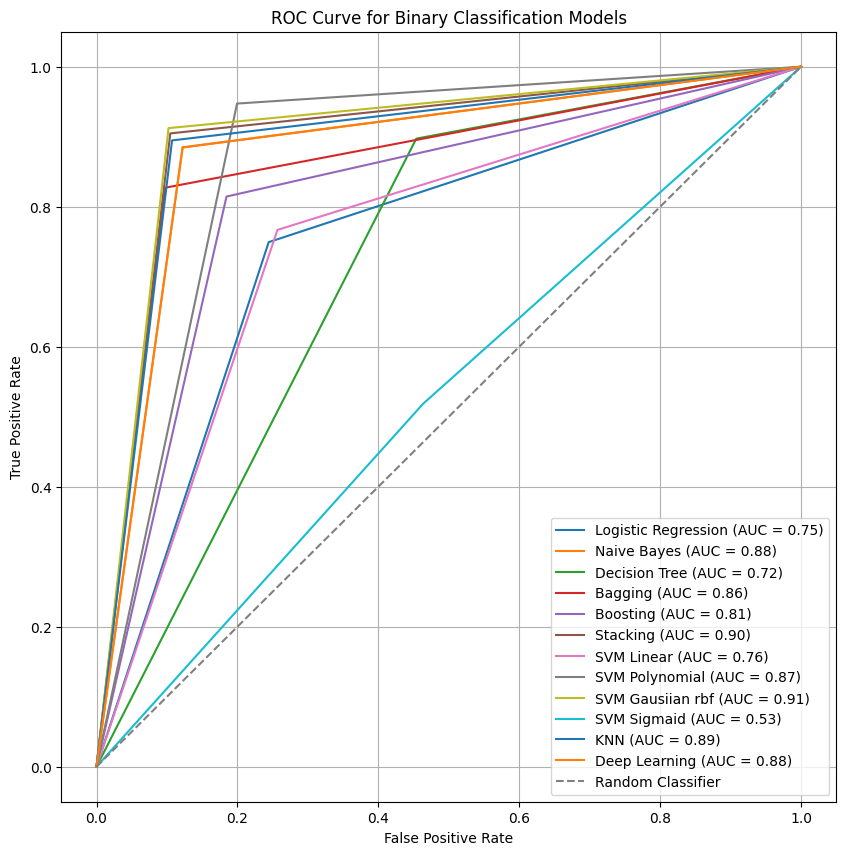

In [279]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
models = [
    (Y_pred,"Logistic Regression"),
    (y_pred,"Naive Bayes"),
    (y_pred_dt,"Decision Tree"),
    (y_pred_bagging, "Bagging"),
    (y_pred_boosting, "Boosting"),
    (y_pred_stacking, "Stacking"),
    (y_pred_linear,"SVM Linear"),
    (y_pred_poly,"SVM Polynomial"),
    (y_pred_rbf,"SVM Gausiian rbf"),
    (y_pred_sigmoid,"SVM Sigmaid"),
    (y_pred_knn,"KNN"),
    (y_pred_dl,"Deep Learning")
]

# Plot ROC curve for each model
plt.figure(figsize=(10,10 ))
for  y_pred_prob, label in models:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Plot ROC curve for random classifier (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification Models')
plt.legend()
plt.grid(True)
plt.show()


## ***Comparing all models***

In [285]:
from tabulate import tabulate
models = [
    (Y_pred,"Logistic Regression"),
    (y_pred,"Naive Bayes"),
    (y_pred_dt,"Decision Tree"),
    (y_pred_bagging, "Bagging"),
    (y_pred_boosting, "Boosting"),
    (y_pred_stacking, "Stacking"),
    (y_pred_linear,"SVM Linear"),
    (y_pred_poly,"SVM Polynomial"),
    (y_pred_rbf,"SVM Gausiian rbf"),
    (y_pred_sigmoid,"SVM Sigmaid"),
    (y_pred_knn,"KNN")
]
results = []
for  y_pred, label in models:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([label, accuracy, precision, recall, f1])

headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]
print(tabulate(results, headers=headers, tablefmt="grid"))

+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1-score |
+=====================+============+=============+==========+============+
| Logistic Regression |    0.7525  |    0.753149 | 0.749373 |   0.751256 |
+---------------------+------------+-------------+----------+------------+
| Naive Bayes         |    0.89375 |    0.8925   | 0.894737 |   0.893617 |
+---------------------+------------+-------------+----------+------------+
| Decision Tree       |    0.72125 |    0.662963 | 0.897243 |   0.762513 |
+---------------------+------------+-------------+----------+------------+
| Bagging             |    0.865   |    0.894309 | 0.827068 |   0.859375 |
+---------------------+------------+-------------+----------+------------+
| Boosting            |    0.815   |    0.814536 | 0.814536 |   0.814536 |
+---------------------+------------+-------------+----------+------------+
| Stacking            |  

## ***Conclusion***

Based on the evaluation metrics including accuracy, precision, recall, and F1-score for each model on the apple quality dataset, we can draw the following conclusions:

1. **Highest Performance Models**:
   - **Naive Bayes, Stacking, SVM Gaussian RBF, and KNN** have the highest accuracy scores, all achieving around 0.89 accuracy. These models also exhibit strong precision, recall, and F1-scores, indicating robust performance across multiple metrics.

2. **Good Performance Models**:
   - **Bagging and SVM Polynomial** also demonstrate good performance, with accuracy scores of approximately 0.87 and 0.88 respectively. They achieve a good balance between precision, recall, and F1-score.
   - **Boosting** shows slightly lower accuracy compared to Bagging and SVM Polynomial but still performs reasonably well.

3. **Models with Moderate Performance**:
   - **Logistic Regression and SVM Linear** exhibit moderate performance with accuracy scores around 0.75. While they are not the top performers, they still provide acceptable results.
   - **Decision Tree** performs relatively lower compared to other models, achieving an accuracy of approximately 0.72.

4. **Poor Performance Models**:
   - **SVM Sigmoid** has the lowest accuracy among all models, achieving around 0.53 accuracy. It also demonstrates lower precision, recall, and F1-score compared to other models.

5. **Recommendation**:
   - Based on the evaluation results, the choice of the model depends on the specific requirements of the application. For high accuracy and overall strong performance, models such as **Naive Bayes, Stacking, SVM Gaussian RBF, and KNN** could be preferred.
   - If interpretability is important, simpler models like **Logistic Regression** might be preferred despite their slightly lower accuracy.
   - However, it's important to consider the trade-offs between accuracy, interpretability, and computational complexity when choosing the final model for deployment.

Overall, the apple quality dataset seems to be well-suited for classification tasks, with several models achieving high accuracy and performance.